In [17]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np
from keras import layers
import pandas as pd
from keras.models import load_model

In [5]:
import pandas as pd
df = pd.read_csv("/media/akib/New Volume1/project/fer2013/fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
train = df[["emotion", "pixels"]][df["Usage"] == "Training"]
train.isnull().sum()

emotion    0
pixels     0
dtype: int64

In [7]:
train['pixels'] = train['pixels'].apply(lambda im: np.fromstring(im, sep=' '))
train.head()

,emotion,pixels
0,0,"[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...."
1,0,"[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111..."
2,2,"[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161..."
3,4,"[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...."
4,6,"[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [8]:
x_train = np.vstack(train['pixels'].values)

In [9]:
x_train

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 74.,  81.,  87., ..., 188., 187., 187.],
       [222., 227., 203., ..., 136., 136., 134.],
       [195., 199., 205., ...,   6.,  15.,  38.]])

In [10]:
y_train = np.array(train["emotion"])
x_train.shape, y_train.shape

((28709, 2304), (28709,))

In [11]:
public_test_df = df[["emotion", "pixels"]][df["Usage"]=="PublicTest"]
private_test_df= df[["emotion", "pixels"]][df["Usage"] == "PrivateTest"]

In [12]:
public_test_df["pixels"] = public_test_df["pixels"].apply(lambda im: np.fromstring(im, sep=' '))
x_test = np.vstack(public_test_df["pixels"].values)
y_test = np.array(public_test_df["emotion"])
private_test_df["pixels"] = private_test_df["pixels"].apply(lambda im: np.fromstring(im, sep=' '))
x_test_private = np.vstack(private_test_df["pixels"].values)
y_test_private = np.array(private_test_df["emotion"])

In [13]:
x_train = x_train.reshape(-1, 48, 48, 1)
x_test = x_test.reshape(-1, 48, 48, 1)
x_train.shape, x_test.shape

((28709, 48, 48, 1), (3589, 48, 48, 1))

In [ ]:
# x_train = np.dstack([x_train]*3)
# x_test = np.dstack([x_test]*3)
# x_train = x_train.reshape(-1, 48,48,3)
# x_test= x_test.reshape (-1,48,48,3)



In [ ]:
# from keras.applications.vgg16 import preprocess_input
# # prepare the image for the VGG model
# image = preprocess_input(x_test_private[0])

In [ ]:
# len(image)

In [ ]:
# x_train.shape
# model_vgg16_conv = VGG16(weights='imagenet', include_top=False,input_shape=(48,48,3))

In [14]:
model_vgg16_conv = VGG16(weights='imagenet', include_top=False,input_shape=(46,46,3))
model_vgg16_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 46, 46, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 46, 46, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 46, 46, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 23, 23, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 23, 23, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 23, 23, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 11, 11, 128)       0         
__________

In [21]:
# model_vgg16_conv.add(model.add(Conv2D(3,(3,3),input_shape = (48,48,1),activation = 'relu')))
for layer in model_vgg16_conv.layers[:]:
    layer.trainable = False
for layer in  model_vgg16_conv.layers:
    print(layer, layer.trainable)

(<keras.engine.input_layer.InputLayer object at 0x7f014c8a5690>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f01011e0a90>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f01011e0d10>, False)
(<keras.layers.pooling.MaxPooling2D object at 0x7f01497dc810>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f01011e49d0>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f0100dae790>, False)
(<keras.layers.pooling.MaxPooling2D object at 0x7f0100daef90>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f0100d40ad0>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f0100d6bc90>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f0100cfc490>, False)
(<keras.layers.pooling.MaxPooling2D object at 0x7f0100d13650>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f0100d26790>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f0100cd1f50>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f0100ce1110>, False)
(<keras.layers.poo

In [22]:
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.convolutional import Conv2D
model = models.Sequential()
model.add(Conv2D(3,(3,3),input_shape = (48,48,1),activation = 'relu'))
model.add(model_vgg16_conv)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu',kernel_initializer = 'he_normal'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128,activation='relu',kernel_initializer = 'he_normal'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7,activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 3)         30        
_________________________________________________________________
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [ ]:
# train_datagen = ImageDataGenerator(
#       rescale=1./255,
#       rotation_range=20,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')
 
# validation_datagen = ImageDataGenerator(rescale=1./255)
 
# # Change the batchsize according to your system RAM
# train_batchsize = 100
# val_batchsize = 10
# train_dir = 
# train_generator = train_datagen.flow_from_directory(
#         train_dir,
#         target_size=(image_size, image_size),
#         batch_size=train_batchsize,
#         class_mode='categorical')
 
# validation_generator = validation_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(image_size, image_size),
#         batch_size=val_batchsize,
#         class_mode='categorical',
#         shuffle=False)

In [ ]:
# my_model = Model(input = input1,output = x)

In [ ]:
# model.summary()

In [15]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train.shape, y_test.shape

((28709, 7), (3589, 7))

In [24]:
epochs = 10

# run model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [16]:
%time
type(model)
%time


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.06 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.15 µs


In [18]:
model = load_model('/home/akib/weights.h5')
hist = model.fit(x_train, y_train, epochs=20,
                 shuffle=True,
                 batch_size=100, validation_data=(x_test, y_test),
                  verbose=2)
model.save('weights.h5')
%time

Train on 28709 samples, validate on 3589 samples
Epoch 1/20
 - 1523s - loss: 1.6047 - acc: 0.3718 - val_loss: 1.5959 - val_acc: 0.3759
Epoch 2/20
 - 1490s - loss: 1.5922 - acc: 0.3771 - val_loss: 1.5982 - val_acc: 0.3711
Epoch 3/20
 - 1491s - loss: 1.5845 - acc: 0.3806 - val_loss: 1.6018 - val_acc: 0.3795
Epoch 4/20
 - 1489s - loss: 1.5671 - acc: 0.3888 - val_loss: 1.6073 - val_acc: 0.3709
Epoch 5/20
 - 1490s - loss: 1.5584 - acc: 0.3930 - val_loss: 1.5821 - val_acc: 0.3926
Epoch 6/20
 - 1490s - loss: 1.5470 - acc: 0.3988 - val_loss: 1.5800 - val_acc: 0.3901
Epoch 7/20
 - 1490s - loss: 1.5340 - acc: 0.4057 - val_loss: 1.5835 - val_acc: 0.3853
Epoch 8/20
 - 1490s - loss: 1.5179 - acc: 0.4136 - val_loss: 1.5825 - val_acc: 0.3920
Epoch 9/20
 - 1490s - loss: 1.5110 - acc: 0.4172 - val_loss: 1.5796 - val_acc: 0.3904
Epoch 10/20
 - 1491s - loss: 1.4966 - acc: 0.4202 - val_loss: 1.5761 - val_acc: 0.3892
Epoch 11/20
 - 1490s - loss: 1.4855 - acc: 0.4252 - val_loss: 1.5779 - val_acc: 0.3926
Epo

In [ ]:
# from keras.applications.vgg16 import preprocess_input
# # prepare the image for the VGG model
# image = preprocess_input(x_test_private[1])
# test = x_test_private[5]
# test = np.dstack([test]*3)
# test = test.reshape(-1,48,48,3)

In [19]:
y_test_private = np_utils.to_categorical(y_test_private)
# x_test_private = np.dstack([x_test_private]*3)
# x_test_private = x_test_private.reshape(-1,48,48,3)

In [20]:
x_test_private = x_test_private.reshape(-1,48,48,1)

In [21]:
scores=model.evaluate(x_test_private,y_test_private,verbose=0)
print(100-scores[1]*100)

59.43159654416822


In [22]:
scores[0]

1.5453918570760035

In [23]:
scores[1]

0.40568403455831775

In [24]:
# 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
dic = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Sad',5:'Surprise',6:'Neutral'}

In [25]:
x_test_private[0] = x_test_private[0].reshape(1,48,48,1)

In [26]:
x_test_private[0].shape

(48, 48, 1)

In [27]:
y_test_private[11]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [29]:

df1 = pd.read_csv("/media/akib/New Volume1/project/fer2013/fer2013.csv")
df1.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [30]:
private_test_df= df1[["emotion", "pixels"]][df1["Usage"] == "PrivateTest"]
private_test_df["pixels"] = private_test_df["pixels"].apply(lambda im: np.fromstring(im, sep=' '))
x_test_private = np.vstack(private_test_df["pixels"].values)
y_test_private = np.array(private_test_df["emotion"])

In [31]:
x_test_private = x_test_private.reshape(-1,48,48,1)

In [32]:
test_private1 = df1[["emotion", "pixels"]][df1["Usage"] == "PrivateTest"]
# train.isnull().sum()

In [33]:
test_private1["pixels"] = test_private1["pixels"].apply(lambda im: np.fromstring(im, sep=' '))
xtest = np.vstack(test_private1["pixels"].values)
ytest = np.array(test_private1["emotion"])


In [46]:
dic = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Sad',5:'Surprise',6:'Neutral'}
from keras.models import load_model

model = load_model('/home/akib/weights.h5')

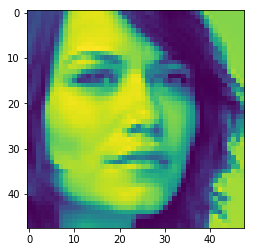

In [92]:
numb=115
tod = xtest[numb].reshape(48,48)

%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(tod, interpolation='nearest')
plt.show()

In [93]:
dic[ytest[numb]]

'Happy'

In [94]:
x_test_privat = np.expand_dims(x_test_private[numb], axis=0)


g=model.predict(x_test_privat)[0]

for x in g:
    print(x*100,dic[np.where(g==x)[0][0]])
    

(12.49268427491188, 'Angry')
(1.5887923538684845, 'Disgust')
(16.826993227005005, 'Fear')
(10.104473680257797, 'Happy')
(26.8909752368927, 'Sad')
(3.587374836206436, 'Surprise')
(28.508716821670532, 'Neutral')


In [38]:
df1['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [14]:
type(df1)

pandas.core.frame.DataFrame

In [15]:
dic

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happy',
 4: 'Sad',
 5: 'Surprise',
 6: 'Neutral'}